In [2]:
import pandas as pd

In [6]:
df = pd.read_csv("../Data/skygeni_sales_data.csv")

In [17]:

df.head()

,deal_id,created_date,closed_date,sales_rep_id,industry,region,product_type,lead_source,deal_stage,deal_amount,sales_cycle_days,outcome,is_won,close_month,close_quarter
0,D00001,2023-11-24,2023-12-15,rep_22,SaaS,North America,Enterprise,Referral,Qualified,4253,21,Won,1,2023-12,2023Q4
1,D00002,2023-01-17,2023-01-27,rep_7,SaaS,India,Core,Referral,Closed,3905,10,Won,1,2023-01,2023Q1
2,D00003,2023-10-29,2023-12-10,rep_5,HealthTech,APAC,Core,Inbound,Proposal,10615,42,Lost,0,2023-12,2023Q4
3,D00004,2023-07-14,2023-08-02,rep_18,FinTech,India,Core,Partner,Negotiation,4817,19,Won,1,2023-08,2023Q3
4,D00005,2024-02-29,2024-05-26,rep_2,HealthTech,APAC,Core,Outbound,Qualified,45203,87,Lost,0,2024-05,2024Q2


In [8]:
df["created_date"] = pd.to_datetime(df["created_date"])
df["closed_date"] = pd.to_datetime(df["closed_date"], errors="coerce")

In [10]:
print(df.info())
print(df.isna().sum())


<class 'pandas.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   deal_id           5000 non-null   str           
 1   created_date      5000 non-null   datetime64[us]
 2   closed_date       5000 non-null   datetime64[us]
 3   sales_rep_id      5000 non-null   str           
 4   industry          5000 non-null   str           
 5   region            5000 non-null   str           
 6   product_type      5000 non-null   str           
 7   lead_source       5000 non-null   str           
 8   deal_stage        5000 non-null   str           
 9   deal_amount       5000 non-null   int64         
 10  sales_cycle_days  5000 non-null   int64         
 11  outcome           5000 non-null   str           
dtypes: datetime64[us](2), int64(2), str(8)
memory usage: 468.9 KB
None
deal_id             0
created_date        0
closed_date         0
sales_rep_

In [11]:
df.shape

(5000, 12)

In [12]:
df.columns

Index(['deal_id', 'created_date', 'closed_date', 'sales_rep_id', 'industry',
       'region', 'product_type', 'lead_source', 'deal_stage', 'deal_amount',
       'sales_cycle_days', 'outcome'],
      dtype='str')

In [13]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   deal_id           5000 non-null   str           
 1   created_date      5000 non-null   datetime64[us]
 2   closed_date       5000 non-null   datetime64[us]
 3   sales_rep_id      5000 non-null   str           
 4   industry          5000 non-null   str           
 5   region            5000 non-null   str           
 6   product_type      5000 non-null   str           
 7   lead_source       5000 non-null   str           
 8   deal_stage        5000 non-null   str           
 9   deal_amount       5000 non-null   int64         
 10  sales_cycle_days  5000 non-null   int64         
 11  outcome           5000 non-null   str           
dtypes: datetime64[us](2), int64(2), str(8)
memory usage: 468.9 KB


In [14]:
df[df['deal_amount']<0]

,deal_id,created_date,closed_date,sales_rep_id,industry,region,product_type,lead_source,deal_stage,deal_amount,sales_cycle_days,outcome


In [15]:
df[df["sales_cycle_days"] < 0]

,deal_id,created_date,closed_date,sales_rep_id,industry,region,product_type,lead_source,deal_stage,deal_amount,sales_cycle_days,outcome


In [16]:
df["is_won"] = (df["outcome"].str.lower() == "won").astype(int)
df["close_month"] = df["closed_date"].dt.to_period("M")
df["close_quarter"] = df["closed_date"].dt.to_period("Q")

In [21]:
win_rate = df["is_won"].mean()
print(win_rate)

0.4526


In [22]:
overall_win_rate = df["is_won"].mean()
print(overall_win_rate)

0.4526


In [23]:
quarterly_win_rate = (
    df.groupby("close_quarter")["is_won"]
      .mean()
      .reset_index()
)
print(quarterly_win_rate)

  close_quarter    is_won
0        2023Q1  0.445122
1        2023Q2  0.450154
2        2023Q3  0.428150
3        2023Q4  0.475170
4        2024Q1  0.466667
5        2024Q2  0.437991
6        2024Q3  0.517241


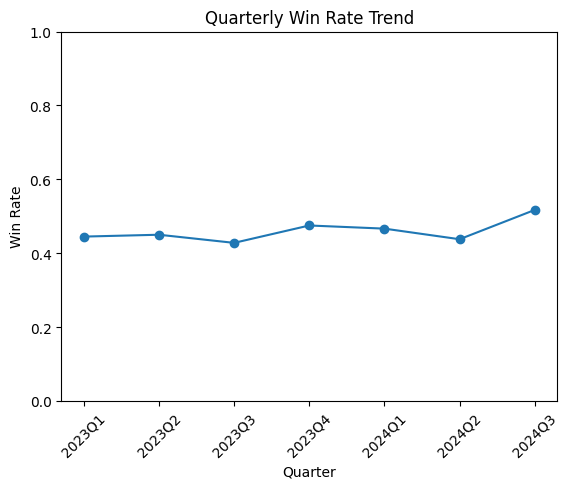

In [25]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(
    quarterly_win_rate["close_quarter"].astype(str),
    quarterly_win_rate["is_won"],
    marker="o"
)

plt.xlabel("Quarter")
plt.ylabel("Win Rate")
plt.title("Quarterly Win Rate Trend")
plt.xticks(rotation=45)
plt.ylim(0, 1)

plt.show()

In [28]:
pipeline_summary = (
    df.groupby("close_quarter")
      .agg(
          deals=("deal_id", "count"),
          total_revenue=("deal_amount", "sum"),
          win_rate=("is_won", "mean")
      )
      .reset_index()
)
print(pipeline_summary)

  close_quarter  deals  total_revenue  win_rate
0        2023Q1    328        7689967  0.445122
1        2023Q2    973       24880389  0.450154
2        2023Q3   1016       27899635  0.428150
3        2023Q4   1027       26799813  0.475170
4        2024Q1    990       26413879  0.466667
5        2024Q2    637       17009398  0.437991
6        2024Q3     29         739383  0.517241


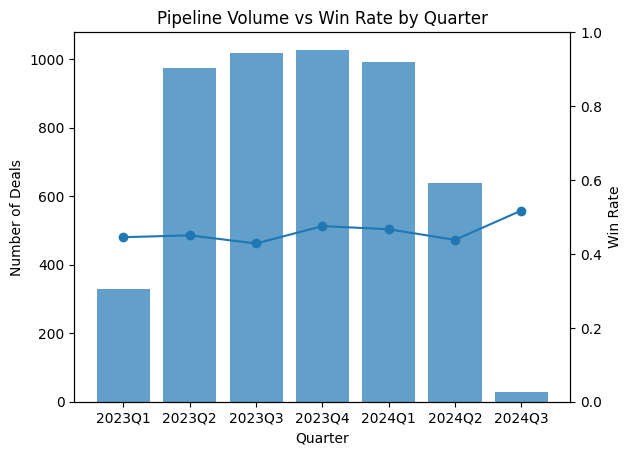

In [27]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

# Bar chart for deal volume
ax1.bar(
    pipeline_summary["close_quarter"].astype(str),
    pipeline_summary["deals"],
    alpha=0.7
)
ax1.set_xlabel("Quarter")
ax1.set_ylabel("Number of Deals")

# Line chart for win rate
ax2 = ax1.twinx()
ax2.plot(
    pipeline_summary["close_quarter"].astype(str),
    pipeline_summary["win_rate"],
    marker="o"
)
ax2.set_ylabel("Win Rate")
ax2.set_ylim(0, 1)

plt.title("Pipeline Volume vs Win Rate by Quarter")
plt.xticks(rotation=45)

plt.show()

In [29]:
stage_win_rate = (
    df.groupby("deal_stage")["is_won"]
      .mean()
      .reset_index()
)
print(stage_win_rate)

    deal_stage    is_won
0       Closed  0.467402
1         Demo  0.458293
2  Negotiation  0.466332
3     Proposal  0.446977
4    Qualified  0.422594


In [30]:
df.groupby("outcome")["sales_cycle_days"].mean()

outcome
Lost    64.230179
Won     63.173221
Name: sales_cycle_days, dtype: float64

In [32]:
lead_win_rate = (
    df.groupby("lead_source")["is_won"]
      .mean()
      .reset_index()
)
print(lead_win_rate)

  lead_source    is_won
0     Inbound  0.460380
1    Outbound  0.455056
2     Partner  0.439516
3    Referral  0.455272


In [33]:
rep_win_rate = (
    df.groupby("sales_rep_id")["is_won"]
      .mean()
      .reset_index()
)
print(rep_win_rate)

   sales_rep_id    is_won
0         rep_1  0.454976
1        rep_10  0.424084
2        rep_11  0.465000
3        rep_12  0.483333
4        rep_13  0.441026
5        rep_14  0.439614
6        rep_15  0.445714
7        rep_16  0.470852
8        rep_17  0.445714
9        rep_18  0.408602
10       rep_19  0.479592
11        rep_2  0.461538
12       rep_20  0.469565
13       rep_21  0.509615
14       rep_22  0.400943
15       rep_23  0.445652
16       rep_24  0.448276
17       rep_25  0.453659
18        rep_3  0.472222
19        rep_4  0.458128
20        rep_5  0.457711
21        rep_6  0.427861
22        rep_7  0.416667
23        rep_8  0.481283
24        rep_9  0.446237


In [35]:
industry_win_rate = (
    df.groupby("industry")["is_won"]
      .mean()
      .reset_index()
)
print(industry_win_rate)

     industry    is_won
0   Ecommerce  0.449057
1      EdTech  0.441532
2     FinTech  0.477054
3  HealthTech  0.445545
4        SaaS  0.451548


In [36]:
product_win_rate = (
    df.groupby("product_type")["is_won"]
      .mean()
      .reset_index()
)
print(product_win_rate)

  product_type    is_won
0         Core  0.455136
1   Enterprise  0.449693
2          Pro  0.452864


In [37]:
df.groupby(["lead_source", "deal_stage"])["is_won"].mean()

lead_source  deal_stage 
Inbound      Closed         0.472325
             Demo           0.422764
             Negotiation    0.482456
             Proposal       0.490637
             Qualified      0.432000
Outbound     Closed         0.450199
             Demo           0.488636
             Negotiation    0.460317
             Proposal       0.449153
             Qualified      0.423868
Partner      Closed         0.443983
             Demo           0.465704
             Negotiation    0.463504
             Proposal       0.409283
             Qualified      0.402844
Referral     Closed         0.504274
             Demo           0.453125
             Negotiation    0.460581
             Proposal       0.434944
             Qualified      0.428571
Name: is_won, dtype: float64